In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from scipy.optimize import curve_fit
from scipy import stats
from progressbar import *
from numpy import trapz
from scipy.integrate import simps
import sympy as sy

In [2]:
# Get Sigma Data
sigma_path = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Sigma_Averages.csv"
sigma_df = pd.read_csv(sigma_path)

In [3]:
# Get LC Data
lc_df = pd.read_csv("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Y_NO_Included_LC_Av.csv")
lc_df = lc_df.dropna()
lc_df.reset_index(drop=True, inplace=True)

In [4]:
lc_df.head(5)

,PAR,Y(II),Y(II)StDev,Y(NPQ),Y(NPQ)StDev,Y(NO),Y(NO)StDev,NPQ,NPQStDev,qN,qNStDev,qP,qPStDev,qL,qLStDev,ETR,ETRStDev,Treatment,Rep
0,0,0.714667,0.001247,0.000000,0.000000,0.285333,0.001247,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,White,1
1,1,0.691667,0.000471,0.005667,0.000471,0.302667,0.000943,0.018333,0.002357,0.023667,0.003300,0.973667,0.000471,0.915000,0.001414,0.300000,0.000000,White,1
2,2,0.694333,0.001700,0.005333,0.001886,0.300333,0.002867,0.018333,0.005437,0.022667,0.006600,0.976667,0.002494,0.923333,0.007134,0.600000,0.000000,White,1
3,11,0.648333,0.007846,0.008667,0.001700,0.343000,0.007257,0.025667,0.004497,0.032333,0.005437,0.913667,0.009286,0.755667,0.021638,2.966667,0.047140,White,1
4,31,0.529000,0.012961,0.016333,0.001700,0.454667,0.012284,0.035667,0.002867,0.044333,0.003300,0.748000,0.017146,0.465333,0.021638,6.900000,0.141421,White,1


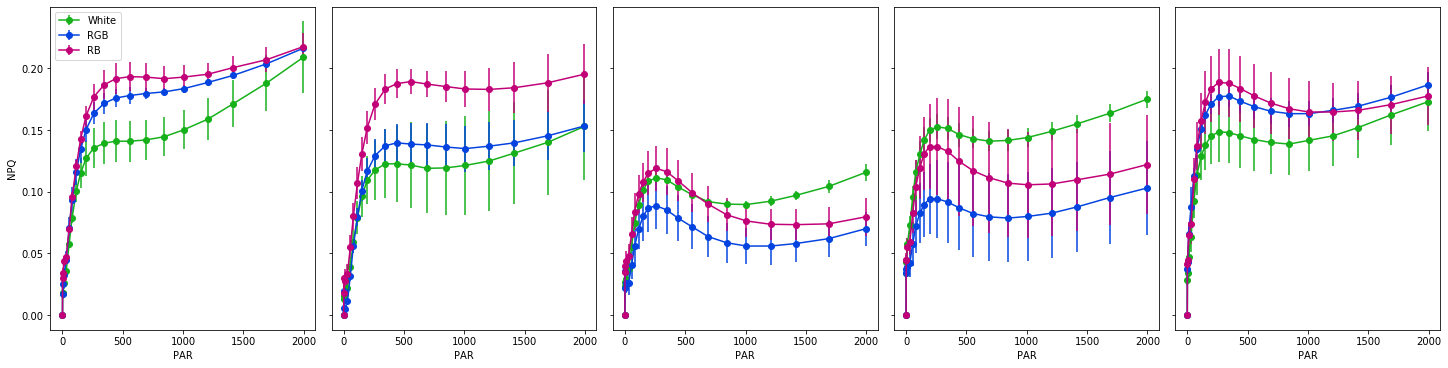

In [5]:
# x_vals = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
param_of_interest = "NPQ"
err_of_interest = param_of_interest + "StDev"

fig, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True, constrained_layout=True)
reps = [1, 2, 3, 4, 5]

white_area, rgb_area, rb_area = [], [], []
for rep, row in zip(reps, ax):
    white_value = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "White")][param_of_interest]
    rgb_value = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RGB")][param_of_interest]
    rb_value = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RB")][param_of_interest]
    white_err = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "White")][err_of_interest]
    rgb_err = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RGB")][err_of_interest]
    rb_err = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RB")][err_of_interest]

    treatment_c = ["xkcd:green", "xkcd:blue", "xkcd:magenta"]
    x_val_param = "PAR"
    white_arr = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "White")][x_val_param]
    rgb_arr = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RGB")][x_val_param]
    rb_arr = lc_df[(lc_df["Rep"] == rep) & (lc_df["Treatment"] == "RB")][x_val_param]

    area = trapz(white_value, dx=1)
    white_area.append(area)
    area = trapz(rgb_value, dx=1)
    rgb_area.append(area)
    area = trapz(rb_value, dx=1)
    rb_area.append(area)
    
    row.errorbar(x=white_arr, y=white_value, yerr=white_err, color=treatment_c[0], marker="o", label="White")
    row.errorbar(x=rgb_arr, y=rgb_value, yerr=rgb_err, color=treatment_c[1], marker="o", label="RGB")
    row.errorbar(x=rb_arr, y=rb_value, yerr=rb_err, color=treatment_c[2], marker="o", label="RB")
    row.set_xlabel("PAR")

ax[0].set_ylabel(param_of_interest)
ax[0].legend(loc="upper left")
# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Revised Figures\\NPQ_over_Time.png", dpi=300)

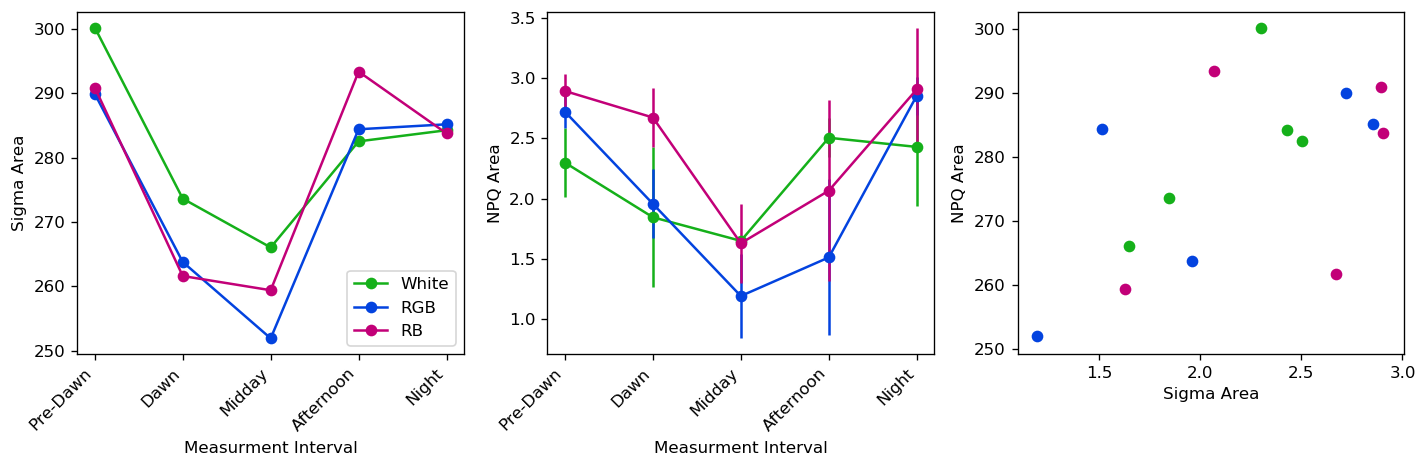

In [8]:
ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]

swhite_area = [300.22, 273.63, 266.04, 282.53, 284.26]
srgb_area = [289.91, 263.78, 251.91, 284.41, 285.18]
srb_area = [290.89, 261.6, 259.39, 293.37, 283.76]

ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]

#SPSS calculated area NPQ
white_area = [2.2983, 1.8447, 1.6490,2.5047, 2.4287]
rgb_area = [2.7210, 1.9563, 1.1910, 1.5113, 2.8537]
rb_area = [2.8927,2.6727,1.6290,2.0653,2.9060]

white_stdev = [0.28465, 0.58145, 0.04036, 0.16258, 0.48796]
rgb_stdev = [0.13191, 0.28674, 0.35142, 0.64704, 0.15899]
rb_stdev = [0.14503, 0.24181,0.32864, 0.75243, 0.51366]

x_vals = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]

treatment_c = ["xkcd:green", "xkcd:blue", "xkcd:magenta"]

fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=120)
ax.plot(swhite_area, color=treatment_c[0], marker="o", label="White")
ax.plot(srgb_area, color=treatment_c[1], marker="o", label="RGB")
ax.plot(srb_area, color=treatment_c[2], marker="o", label="RB")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(x_vals, rotation=45, ha="right")
ax.set_ylabel("Sigma Area")
ax.set_xlabel("Measurment Interval")

ax1.errorbar(x=x_vals, y=white_area, color=treatment_c[0], marker="o", yerr=white_stdev)
ax1.errorbar(x=x_vals, y=rgb_area, color=treatment_c[1], marker="o", yerr=rgb_stdev)
ax1.errorbar(x=x_vals, y=rb_area, color=treatment_c[2], marker="o", yerr=rb_stdev)
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(x_vals, rotation=45, ha="right")
ax1.set_ylabel("NPQ Area")
ax1.set_xlabel("Measurment Interval")

ax2.scatter(white_area, swhite_area, color=treatment_c[0], marker="o")
ax2.scatter(rgb_area, srgb_area, color=treatment_c[1], marker="o")
ax2.scatter(rb_area, srb_area, color=treatment_c[2], marker="o")
ax2.set_xlabel("Sigma Area")
ax2.set_ylabel("NPQ Area")
ax.legend()

plt.tight_layout()
plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Revised Figures\\NPQ_and_Sigma.png", dpi=300)

In [ ]:
##### PARAMS_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Phenobottle Parameters Chapter 4\\"

bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density", "temperature", "LIGHT_INTENSITY","fo", 
            "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
            "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"] 
ojip_arr = []
for bottle in bottles:
    ojip_data = pd.read_csv(PARAMS_DIR + "PB{}Params.csv".format(bottle), sep=",", encoding='cp1252', names=parameters)
    ojip_data['Bottle_Num'] = pd.Series(np.repeat(bottle, len(ojip_data["day_night"])), index=ojip_data.index)
    ojip_arr.append(ojip_data)

ojip_df = pd.concat(ojip_arr)
ojip_df.reset_index(drop=True, inplace=True)

In [90]:
pbar = ProgressBar(maxval=len(ojip_df))
pbar.start()
for i in range(len(ojip_df)):
    ojip_df.replace(to_replace=ojip_df["sql_time"][i], value=ojip_df["sql_time"][i][:16], inplace=True)
    pbar.update(i)
pbar.finish()
ojip_df.head()

100% |########################################################################|


,sql_time,day_night,od_raw,transmittance,optical_density,temperature,LIGHT_INTENSITY,fo,f_300us,fj,...,fi_fo,fi_fj,fm_fi,fo_od,fj_od,fi_od,fm_od,variable_fluorescence_od,fm_qa_od,Bottle_Num
0,2020/03/30 13:26,N/a,0,0.00,0.000,0,220,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,1
1,2020/03/30 13:30,Day,3151,77.14,0.113,0,220,0.147,0.177,0.186,...,0.050,0.011,0.004,1.301,1.646,1.743,1.779,0.478,NaN,1
2,2020/03/30 13:40,Day,3130,76.62,0.116,0,220,0.526,0.847,1.250,...,1.015,0.291,0.045,4.534,10.776,13.284,13.672,9.138,NaN,1
3,2020/03/30 13:50,Day,3013,73.76,0.132,0,220,0.226,0.359,0.490,...,0.356,0.092,0.020,1.712,3.712,4.409,4.561,2.848,NaN,1
4,2020/03/30 14:00,Day,3072,75.20,0.124,0,220,0.200,0.310,0.417,...,0.283,0.066,0.016,1.613,3.363,3.895,4.024,2.411,NaN,1


103


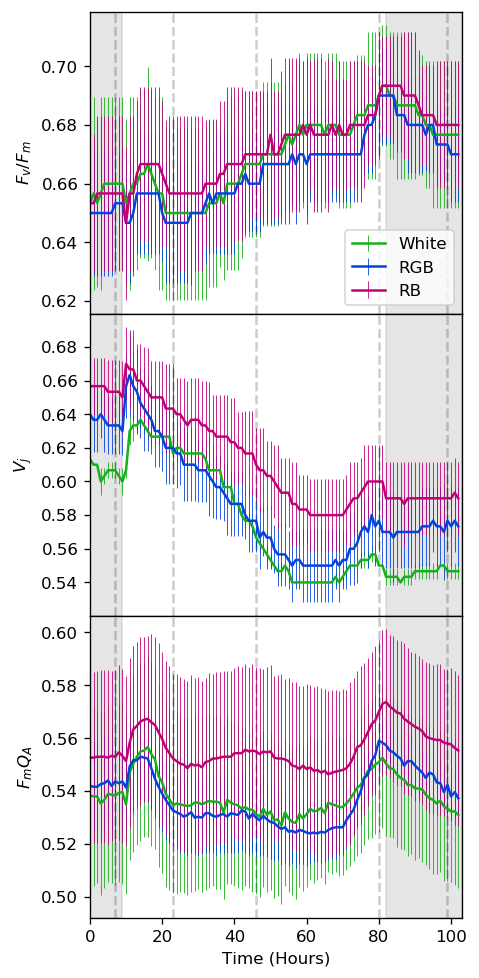

In [132]:
## Plot Second OD Data
# Get Selected OJIP Data
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density", "temperature", "LIGHT_INTENSITY","fo", 
            "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
            "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"] 
dates_2 = ["2020/04/11 06:30", "2020/04/11 11:30", "2020/04/11 15:40", "2020/04/11 19:50", "2020/04/11 23:30"]
bottle1_dates = ["2020/04/11 06:30", "2020/04/11 22:50"]
ojip_selected_2 = {}
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]

colors =  ["xkcd:green", "xkcd:blue", "xkcd:magenta"]


for bottle in bottles:
    ojip_bottle = ojip_df.loc[(ojip_df["sql_time"] >= dates_2[0]) & (ojip_df["Bottle_Num"] == bottle) & (ojip_df["sql_time"] <= dates_2[4])]
    ojip_bottle.reset_index(drop=True, inplace=True)
    ojip_selected_2["Bottle{}".format(bottle)] = ojip_bottle

def average_and_std_parameter(rep1, rep2, rep3):
    convert_rep1, convert_rep2, convert_rep3 = np.array(rep1), np.array(rep2), np.array(rep3)
    flatten_rep1, flatten_rep2, flatten_rep3 = convert_rep1.flatten(), convert_rep2.flatten(), convert_rep3.flatten()
    average_values = (np.array(flatten_rep1) + np.array(flatten_rep2) + np.array(flatten_rep3)) / 3
    stdev_values = (np.std([np.array(flatten_rep1), np.array(flatten_rep2), np.array(flatten_rep3)], axis=0))
    return average_values, stdev_values

fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 10), dpi=120, sharex=True)
index = np.arange(len(ojip_selected_2["Bottle1"]))

print(len(ojip_selected_2["Bottle1"]))

treatment_c = ["#f9dd3f", "#2282ce", "#d72bf7"]

sel_feature = "quantum_yield"

white_parameters = average_and_std_parameter(ojip_selected_2["Bottle1"][sel_feature], ojip_selected_2["Bottle2"][sel_feature],
                                             ojip_selected_2["Bottle3"][sel_feature])
rgb_parameters = average_and_std_parameter(ojip_selected_2["Bottle6"][sel_feature], ojip_selected_2["Bottle7"][sel_feature], 
                                           ojip_selected_2["Bottle8"][sel_feature])
rb_parameters = average_and_std_parameter(ojip_selected_2["Bottle4"][sel_feature], ojip_selected_2["Bottle9"][sel_feature], 
                                          ojip_selected_2["Bottle10"][sel_feature])
ax.errorbar(index, white_parameters[0], yerr=white_parameters[1], color=colors[0], ecolor=colors[0], elinewidth=0.5, label="White")
ax.errorbar(index, rgb_parameters[0], yerr=rgb_parameters[1], color=colors[1], ecolor=colors[1], elinewidth=0.5, label="RGB")
ax.errorbar(index, rb_parameters[0], yerr=rb_parameters[1], color=colors[2], ecolor=colors[2], elinewidth=0.5, label="RB")

sel_feature = "vj"

white_parameters = average_and_std_parameter(ojip_selected_2["Bottle1"][sel_feature], ojip_selected_2["Bottle2"][sel_feature],
                                             ojip_selected_2["Bottle3"][sel_feature])
rgb_parameters = average_and_std_parameter(ojip_selected_2["Bottle6"][sel_feature], ojip_selected_2["Bottle7"][sel_feature], 
                                           ojip_selected_2["Bottle8"][sel_feature])
rb_parameters = average_and_std_parameter(ojip_selected_2["Bottle4"][sel_feature], ojip_selected_2["Bottle9"][sel_feature], 
                                          ojip_selected_2["Bottle10"][sel_feature])
ax2.errorbar(index, white_parameters[0], yerr=white_parameters[1], color=colors[0], ecolor=colors[0], elinewidth=0.5)
ax2.errorbar(index, rgb_parameters[0], yerr=rgb_parameters[1], color=colors[1], ecolor=colors[1], elinewidth=0.5)
ax2.errorbar(index, rb_parameters[0], yerr=rb_parameters[1], color=colors[2], ecolor=colors[2], elinewidth=0.5)

sel_feature = "fm_qa"

white_parameters = average_and_std_parameter(ojip_selected_2["Bottle1"][sel_feature], ojip_selected_2["Bottle2"][sel_feature],
                                             ojip_selected_2["Bottle3"][sel_feature])
rgb_parameters = average_and_std_parameter(ojip_selected_2["Bottle6"][sel_feature], ojip_selected_2["Bottle7"][sel_feature], 
                                           ojip_selected_2["Bottle8"][sel_feature])
rb_parameters = average_and_std_parameter(ojip_selected_2["Bottle4"][sel_feature], ojip_selected_2["Bottle9"][sel_feature], 
                                          ojip_selected_2["Bottle10"][sel_feature])
ax3.errorbar(index, white_parameters[0], yerr=white_parameters[1], color=colors[0], ecolor=colors[0], elinewidth=0.5)
ax3.errorbar(index, rgb_parameters[0], yerr=rgb_parameters[1], color=colors[1], ecolor=colors[1], elinewidth=0.5)
ax3.errorbar(index, rb_parameters[0], yerr=rb_parameters[1], color=colors[2], ecolor=colors[2], elinewidth=0.5)

ax.set_ylabel("$F_{v}/F_{m}$")
ax2.set_ylabel("$V_{j}$")
ax3.set_ylabel("$F_{m}Q_{A}$")
ax3.set_xlabel("Time (Hours)")

# ax.set_yticks(np.arange(0.62, 0.72, 0.02))
# ax.set_ylim(0.62, 0.72)
# ax2.set_yticks(np.arange(0.52, 0.72, 0.04))
# ax2.set_ylim(0.52, 0.72)
# ax3.set_yticks(np.arange(0.2, 1.6, 0.2))
# ax3.set_ylim(0.2, 1.6)

# ax3.set_xticklabels(np.arange(17))
ax3.set_xlim(0, 103)

ax.axvspan(0, 9, alpha=0.2, color="grey")
ax2.axvspan(0, 9, alpha=0.2, color="grey")
ax3.axvspan(0, 9, alpha=0.2, color="grey")
ax.axvspan(82, 103, alpha=0.2, color="grey")
ax2.axvspan(82, 103, alpha=0.2, color="grey")
ax3.axvspan(82, 103, alpha=0.2, color="grey")

labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
x_vals = [7, 23, 46, 80, 99]

for i in range(len(labels)):
    ax.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.2, linestyle="--")
    ax2.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.2, linestyle="--")
    ax3.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.2, linestyle="--")

# ax.text(0.3, 0.714, "(a)")
# ax2.text(0.3, 0.708, "(b)")
# ax3.text(0.3, 1.52, "(c)")
ax.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)

fig.subplots_adjust(hspace=0.0001, right=None)
ax.legend(loc="lower right")

# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Preliminary Figures\\Figure6.png", dpi=300, bbox_inches="tight")


In [5]:
# Get Data For Figure 3
rep_numbers = [1, 2, 3, 4, 5]
light_colors = ["WHITE", "RGB", "RB"]
time_of_day = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
white_etr_av, rgb_etr_av, rb_etr_av = [], [], [] 
white_etr_stdev, rgb_etr_stdev, rb_etr_stdev = [], [], [] 
white_par_av, rgb_par_av, rb_par_av = [], [], [] 
white_par_stdev, rgb_par_stdev, rb_par_stdev = [], [], [] 

for rep in rep_numbers: 
    for light in light_colors:
        lc_selection = lc_df.loc[(lc_df["Rep"] == rep) & (lc_df["Light"] == light)]
        if light == "WHITE":
            white_etr_av.append(lc_selection["ETR(II)"])
            white_etr_stdev.append(lc_selection["ETR(II)StDev"])
            white_par_av.append(lc_selection["PAR(II)"])
            white_par_stdev.append(lc_selection["PAR(II)StDev"])
        if light == "RGB":
            rgb_etr_av.append(lc_selection["ETR(II)"])
            rgb_etr_stdev.append(lc_selection["ETR(II)StDev"])
            rgb_par_av.append(lc_selection["PAR(II)"])
            rgb_par_stdev.append(lc_selection["PAR(II)StDev"])
            
        if light == "RB":
            rb_etr_av.append(lc_selection["ETR(II)"])
            rb_etr_stdev.append(lc_selection["ETR(II)StDev"])
            rb_par_av.append(lc_selection["PAR(II)"])
            rb_par_stdev.append(lc_selection["PAR(II)StDev"])

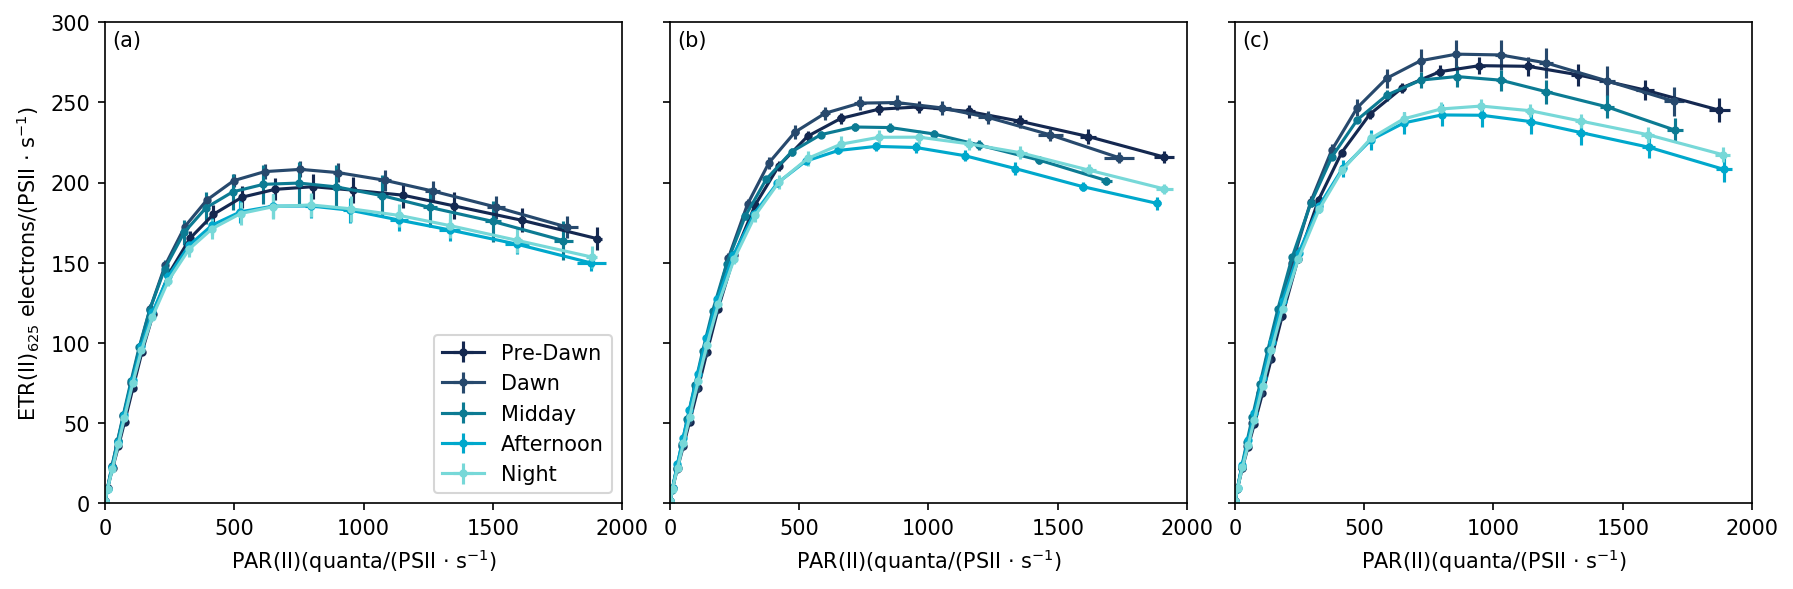

In [6]:
# Plot Figure 3
fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=150, sharey=True, sharex=True)
time_colors = ["#142850", "#27496d", "#0c7b93", "#00a8cc", "#77d8d8"]

for i in range(len(white_par_av)):
    ax.errorbar(white_par_av[i], white_etr_av[i], xerr=white_par_stdev[i], yerr=white_etr_stdev[i], color=time_colors[i], 
                marker="o", markersize=3, label=str(time_of_day[i]))
    ax1.errorbar(rgb_par_av[i], rgb_etr_av[i], xerr=rgb_par_stdev[i], yerr=rgb_etr_stdev[i], color=time_colors[i], 
                 marker="o", markersize=3)
    ax2.errorbar(rb_par_av[i], rb_etr_av[i], xerr=rb_par_stdev[i], yerr=rb_etr_stdev[i], color=time_colors[i], 
                 marker="o", markersize=3)

ax.text(30, 285, s="(a)")
ax1.text(30, 285, s="(b)")
ax2.text(30, 285, s="(c)") 
    
x_label = "PAR(II)(quanta/(PSII $\cdot$ s$^{-1}$)"
ax.set_xlabel(x_label)
ax1.set_xlabel(x_label)
ax2.set_xlabel(x_label)

y_label = "ETR(II)$_{625}$ electrons/(PSII $\cdot$ s$^{-1}$)"
ax.set_ylabel(y_label)

x_ticks = [0, 500, 1000, 1500, 2000]
ax.set_xticks(x_ticks)

ax1.set_xticks(x_ticks)
ax2.set_xticks(x_ticks)

plt.tight_layout()
plt.xlim(0, 2000)
plt.ylim(0, 300)
ax.legend(loc="lower right")
#plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figure3.png", dpi=300)

In [8]:
# Get Selected OJIP Data
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density", "temperature", "LIGHT_INTENSITY","fo", 
            "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
            "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"] 
dates = ["2020/04/04 07:20", "2020/04/04 11:30", "2020/04/04 15:40", "2020/04/04 19:50", "2020/04/04 22:30"]
bottle1_dates = ["2020/04/11 06:30", "2020/04/11 22:50"]
ojip_selected = {}
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]

for bottle in bottles:
    if bottle != "1":
        ojip_bottle = ojip_df.loc[(ojip_df["sql_time"] >= dates[0]) & (ojip_df["Bottle_Num"] == bottle) & (ojip_df["sql_time"] <= dates[4])]
        ojip_selected["Bottle{}".format(bottle)] = ojip_bottle
    else:
        ojip_bottle = ojip_df.loc[(ojip_df["sql_time"] >= bottle1_dates[0]) & (ojip_df["Bottle_Num"] == bottle) & (ojip_df["sql_time"] <= bottle1_dates[1])]
        ojip_selected["Bottle{}".format(bottle)] = ojip_bottle

<ErrorbarContainer object of 3 artists>

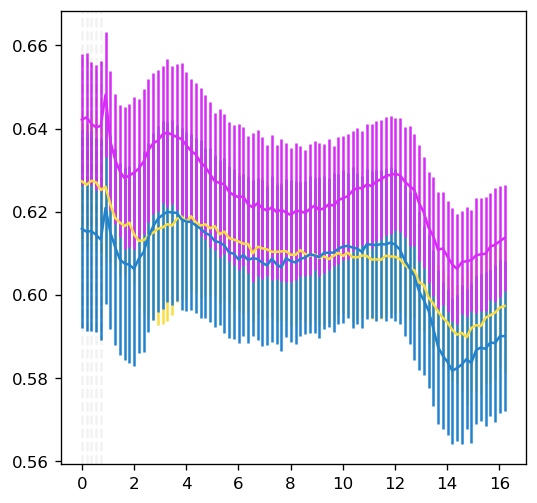

In [37]:
PB1, PB2, PB3 = [], [], []
PB6, PB7, PB8 = [], [], []
PB4, PB9, PB10 = [], [], []
for bottle in bottles:
    od = ojip_selected["Bottle{}".format(bottle)]["optical_density"]
    fo = ojip_selected["Bottle{}".format(bottle)]["fo"]
    f_300us = ojip_selected["Bottle{}".format(bottle)]["f_300us"]
    fj = ojip_selected["Bottle{}".format(bottle)]["fj"]
    fi = ojip_selected["Bottle{}".format(bottle)]["fi"]
    fm = ojip_selected["Bottle{}".format(bottle)]["fm"]
    fj_fo = (fj - fo)
    fi_fo = (fi - fo)
    fv = (fm - fo)
    fv_fm = fv / fm
    vj = (fj - fo) / fv
    eff_prob = f_300us / fj
    mo = 4 * ((f_300us - fo) / fv)
    piabs = ((1 - (fo / fm)) / (mo / vj)) * (fv / fo) * ((1 - vj) / vj)
    fm_qa = (fj - fo) / (fj)
    if bottle == "1": 
        PB1.append(eff_prob)    
    if bottle == "2": 
        PB2.append(eff_prob)
    if bottle == "3": 
        PB3.append(eff_prob)  
    if bottle == "6": 
        PB6.append(eff_prob)    
    if bottle == "7": 
        PB7.append(eff_prob)
    if bottle == "8": 
        PB8.append(eff_prob)
    if bottle == "4": 
        PB4.append(eff_prob)    
    if bottle == "9": 
        PB9.append(eff_prob)
    if bottle == "10": 
        PB10.append(eff_prob)
        
def normalise_parameter(rep1, rep2, rep3):
    convert_rep1, convert_rep2, convert_rep3 = np.array(rep1), np.array(rep2), np.array(rep3)
    flatten_rep1, flatten_rep2, flatten_rep3 = convert_rep1.flatten(), convert_rep2.flatten(), convert_rep3.flatten()
    normalise_rep1, normalise_rep2, normalise_rep3 = [], [], []
    for i in range(len(flatten_rep2)):
        normalise_rep1.append(flatten_rep1[i] - flatten_rep1[8])
        normalise_rep2.append(flatten_rep2[i] - flatten_rep2[8])
        normalise_rep3.append(flatten_rep3[i] - flatten_rep3[8])  
    average_values = (np.array(normalise_rep1) + np.array(normalise_rep2) + np.array(normalise_rep3)) / 3
    stdev_values = []
    for i in range(len(normalise_rep1)):
        stdev_values.append(np.std([normalise_rep1[i], normalise_rep2[i], normalise_rep3[i]]))
    return average_values, stdev_values

def average_and_std_parameter(rep1, rep2, rep3):
    convert_rep1, convert_rep2, convert_rep3 = np.array(rep1), np.array(rep2), np.array(rep3)
    flatten_rep1, flatten_rep2, flatten_rep3 = convert_rep1.flatten()[:90], convert_rep2.flatten()[:90], convert_rep3.flatten()[:90]
    average_values = (np.array(flatten_rep1) + np.array(flatten_rep2) + np.array(flatten_rep3)) / 3
    stdev_values = (np.std([np.array(flatten_rep1), np.array(flatten_rep2), np.array(flatten_rep3)], axis=0))
    return average_values, stdev_values

white_parameters = average_and_std_parameter(PB1, PB2, PB3)
rgb_parameters = average_and_std_parameter(PB6, PB7, PB8)
rb_parameters = average_and_std_parameter(PB4, PB9, PB10)

# white_parameters = normalise_parameter(PB1, PB2, PB3)
# rgb_parameters = normalise_parameter(PB6, PB7, PB8)
# rb_parameters = normalise_parameter(PB4, PB9, PB10)

treatment_c = ["#f9dd3f", "#2282ce", "#d72bf7"]
fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1,  dpi=120)

x_vals = index = np.arange(0, 16.33, .182)
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
plt.errorbar(x_vals, white_parameters[0], yerr=white_parameters[1], color=treatment_c[0])
plt.errorbar(x_vals, rgb_parameters[0], yerr=rgb_parameters[1], color=treatment_c[1])
plt.errorbar(x_vals, rb_parameters[0], yerr=rb_parameters[1], color=treatment_c[2])


In [11]:
# Second Test OJIP LC Test
colors = ["red", "green", "blue", "orange", "magenta", "yellow", "black", "brown", "cyan"]
OJIP_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\\"
nd_test_date = "2020/04/11 13:30"

selected_transients_2 = {}
for bottle in bottles:
    ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                          "value_ojip", "norm_ojip"])     
    select_trend = ojip_data["sql_time"]
    for i, trend in enumerate(select_trend):
        if trend.startswith(nd_test_date):
            select_trend = ojip_data["norm_ojip"][i]
            selected_transients_2["Bottle{}".format(bottle)] = select_trend

            
lc2_av_path = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data\\Second Test Files\\LC_Averages_Second.csv"
lc2_df = pd.read_csv(lc2_av_path)
lc2_df = lc2_df.dropna()
lc2_df.reset_index(drop=True, inplace=True)
lc2_df.head(2)          
            

NameError: name 'bottles' is not defined

0.8826666666666667 0.0036817870057290905
0.8456666666666667 0.0016996731711975965
0.8466666666666667 0.005906681715556456
207.8930018 6.248384108
239.46015930000004 0.600227958
242.2667261 7.109296799999999


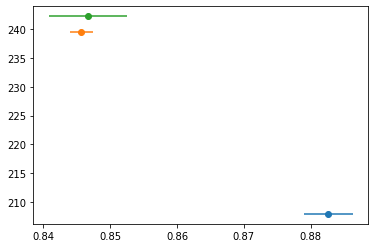

In [84]:
def format_ojip(x, y, z):
    de_stringify1 = [float(s) for s in x.split(",")]
    de_stringify2 = [float(s) for s in y.split(",")]
    de_stringify3 = [float(s) for s in z.split(",")]
    average_values = (np.array(de_stringify1) + np.array(de_stringify2) + np.array(de_stringify3)) / 3
    stdev_values = (np.std([np.array(de_stringify1), np.array(de_stringify2), np.array(de_stringify3)], axis=0))
    return average_values, stdev_values

white_ojip2 = format_ojip(selected_transients_2["Bottle1"], selected_transients_2["Bottle2"], selected_transients_2["Bottle3"])
rgb_ojip2 = format_ojip(selected_transients_2["Bottle6"], selected_transients_2["Bottle7"], selected_transients_2["Bottle8"])
rb_ojip2 = format_ojip(selected_transients_2["Bottle4"], selected_transients_2["Bottle9"], selected_transients_2["Bottle10"])

etrII_max_w = max(lc2_df["WhiteETRII_Av"])
etrII_max_rgb = max(lc2_df["RGBETRII_Av"])
etrII_max_rb = max(lc2_df["RBETRII_Av"])

etrII_err_white = lc2_df["WhiteETRII_StDev"][15]
etrII_err_rgb = lc2_df["RGBETRII_StDev"][15]
etrII_err_rb = lc2_df["RBETRII_StDev"][15]

plt.errorbar(white_ojip2[0][1999], etrII_max_w, xerr=white_ojip2[1][1999], marker="o")
plt.errorbar(rgb_ojip2[0][1999], etrII_max_rgb, xerr=rgb_ojip2[1][1999], marker="o")
plt.errorbar(rb_ojip2[0][1999], etrII_max_rb, xerr=rb_ojip2[1][1999], marker="o")

print(white_ojip2[0][1999], white_ojip2[1][1999])
print(rgb_ojip2[0][1999], rgb_ojip2[1][1999])
print(rb_ojip2[0][1999], rb_ojip2[1][1999])
print(etrII_max_w, etrII_err_white)
print(etrII_max_rgb, etrII_err_rgb)
print(etrII_max_rb, etrII_err_rb)

ojip_val = [0.883, 0.846, 0.847]
ojip_stdev = [0.004, 0.002, 0.006]
lc_val = [207.89, 239.46, 242.27]
lc_stdev = [6.25, 0.60, 7.11]




In [83]:
# Calculated Average of Entire OJIP trend for each light treatment 
colors = ["red", "green", "blue", "orange", "magenta", "yellow", "black", "brown", "cyan"]
OJIP_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\\"
dates = ["2020/04/04 06:30", "2020/04/04 11:30", "2020/04/04 15:40", "2020/04/04 19:50", "2020/04/04 22:50"]
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]
selected_transients = {}
for bottle in bottles:
    ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                          "value_ojip", "norm_ojip"])     
    select_trend = ojip_data.loc[(ojip_data["sql_time"] >= dates[0]) & (ojip_data["sql_time"] <= dates[4])]
    select_trend = select_trend["norm_ojip"]
    selected_transients["Bottle{}".format(bottle)] = select_trend

756    2020/04/04 19:30:45
757    2020/04/04 19:40:45
758    2020/04/04 19:50:44
759    2020/04/04 20:00:40
760    2020/04/04 20:10:40
761    2020/04/04 20:20:40
762    2020/04/04 20:30:41
763    2020/04/04 20:40:41
764    2020/04/04 20:50:40
765    2020/04/04 21:00:40
766    2020/04/04 21:10:40
767    2020/04/04 21:20:41
768    2020/04/04 21:30:41
769    2020/04/04 21:40:40
770    2020/04/04 21:50:40
771    2020/04/04 22:00:40
772    2020/04/04 22:10:41
773    2020/04/04 22:20:41
774    2020/04/04 22:30:41
775    2020/04/04 22:40:40
Name: sql_time, dtype: object
755    2020/04/04 19:30:44
756    2020/04/04 19:40:45
757    2020/04/04 19:50:45
758    2020/04/04 20:00:40
759    2020/04/04 20:10:40
760    2020/04/04 20:20:40
761    2020/04/04 20:30:40
762    2020/04/04 20:40:40
763    2020/04/04 20:50:41
764    2020/04/04 21:00:41
765    2020/04/04 21:10:40
766    2020/04/04 21:20:40
767    2020/04/04 21:30:40
768    2020/04/04 21:40:40
769    2020/04/04 21:50:40
770    2020/04/04 22:00:4

ValueError: shape mismatch: objects cannot be broadcast to a single shape

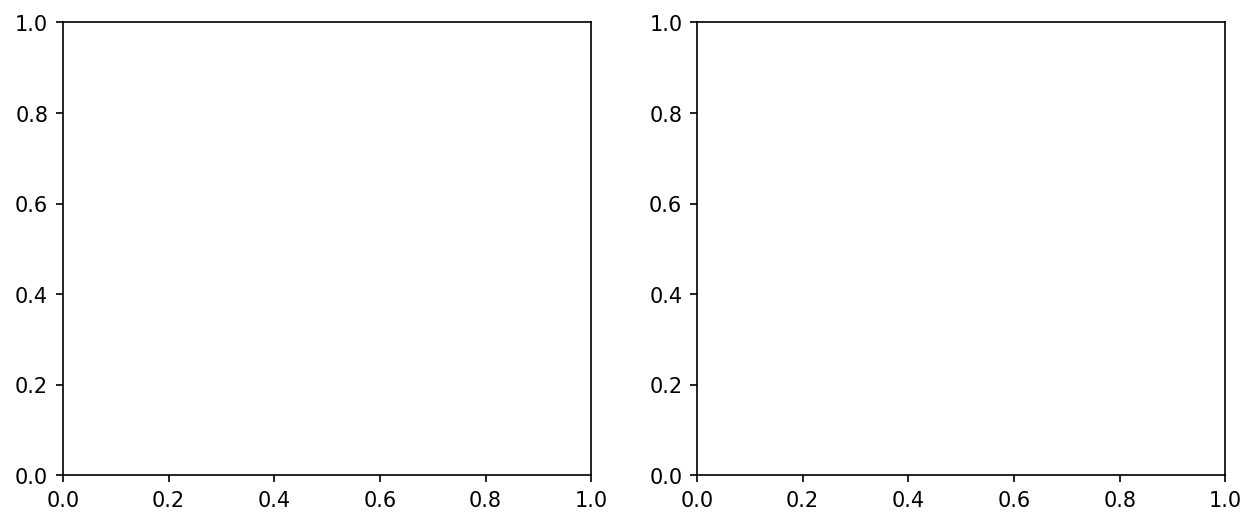

In [68]:
def split_ojip(x, y, z):
    x.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    z.reset_index(drop=True, inplace=True)
    destrung_ojip1, destrung_ojip2, destrung_ojip3 = [], [], []
    area1, area2, area3 = [], [], []
    for i in range(len(x)):
        de_stringify1 = [float(s) for s in x[i].split(",")]
        de_stringify2 = [float(s) for s in y[i].split(",")]
        de_stringify3 = [float(s) for s in z[i].split(",")]
        destrung_ojip1.append(de_stringify1)
        destrung_ojip2.append(de_stringify2)
        destrung_ojip3.append(de_stringify3)
    average_values = (np.array(destrung_ojip1) + np.array(destrung_ojip2) + np.array(destrung_ojip3)) / 3
    stdev_values = []
    for i in range(len(x)):
        stdev_values.append(np.std([np.array(destrung_ojip1[i]), np.array(destrung_ojip2[i]), np.array(destrung_ojip3[i])], axis=0))
    return average_values, stdev_values

white_ojip = split_ojip(selected_transients["Bottle1"], selected_transients["Bottle2"], selected_transients["Bottle3"])
rgb_ojip = split_ojip(selected_transients["Bottle6"], selected_transients["Bottle7"], selected_transients["Bottle8"])
rb_ojip = split_ojip(selected_transients["Bottle4"], selected_transients["Bottle9"], selected_transients["Bottle10"])

x_time = [float(s) for s in ojip_data["time_ojip"][0].split(",")]

def line_fit(x):
    return x * -1164.68 + 1229.57

white_fit, rgb_fit, rb_fit = [], [], []
white_err, rgb_err, rb_err = [], [], []
for i in range(len(white_ojip[0])):
    white_fit.append(line_fit(white_ojip[0][i][1999]))
    rgb_fit.append(line_fit(rgb_ojip[0][i][1999]))
    rb_fit.append(line_fit(rb_ojip[0][i][1999]))

fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=150)

treatment_c = ["#f9dd3f", "#2282ce", "#d72bf7"]

index = np.arange(len(last_value_ojip_w))

time_index = []
last_value_ojip_w, last_value_ojip_rgb, last_value_ojip_rb = [], [], []
error_ojip_w, error_ojip_rgb, error_ojip_rb = [], [], []
for w_value, rgb_value, rb_value, white_err, rgb_err, rb_err in zip(white_ojip[0], rgb_ojip[0], rb_ojip[0], 
                                                                    white_ojip[1], rgb_ojip[1], rb_ojip[1]):
    last_value_ojip_w.append(w_value[1999])
    last_value_ojip_rgb.append(rgb_value[1999])
    last_value_ojip_rb.append(rb_value[1999])
    error_ojip_w.append(white_err[1999])
    error_ojip_rgb.append(rgb_err[1999])
    error_ojip_rb.append(rb_err[1999])
    
ax.errorbar(index, last_value_ojip_w, yerr=error_ojip_w, ecolor="xkcd:light grey", marker="o", markersize=3, color=treatment_c[0])
ax.errorbar(index, last_value_ojip_rgb, yerr=error_ojip_rgb, ecolor="xkcd:light grey", marker="o", markersize=3, color=treatment_c[1])
ax.errorbar(index, last_value_ojip_rb, yerr=error_ojip_rb, ecolor="xkcd:light grey", marker="o", markersize=3, color=treatment_c[2])

ax2.errorbar(index, white_fit, color=treatment_c[0])
ax2.plot(index, rgb_fit, color=treatment_c[1])
ax2.plot(index, rb_fit, color=treatment_c[2])

ax.set_xlabel("Time (hours)")
ax.set_ylabel("Normalised Fluorescence Intensity (A.u)")
ax.set_ylim(0.8, 0.91)

ax2.set_ylim(170, 290)
ax2.set_xlabel("Time (hours)")
ax2.set_ylabel("$ETR(II)_{MAX}$")
# plt.savefig("C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Figures\\Recalculated_ETRII.png", dpi=300)


In [94]:
colors = ["red", "green", "blue", "orange", "magenta", "yellow", "black", "brown", "cyan"]
OJIP_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\\"
dates = ["2020/04/04 08:00", "2020/04/04 10:10", "2020/04/04 14:20", "2020/04/04 19:40", "2020/04/04 21:50"]
#dates2 = ["2020/04/11 06:30", "2020/04/11 11:30", "2020/04/11 15:40", "2020/04/11 19:50", "2020/04/11 22:50"]
bottles = ["1", "2", "3", "4", "6", "7", "8", "9", "10"]
selected_transients = {}
for bottle in bottles:
    ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                          "value_ojip", "norm_ojip"])     
    select_trend = ojip_data.loc[(ojip_data["sql_time"] >= dates[0]) & (ojip_data["sql_time"] <= dates[4])]
    select_trend = select_trend["norm_ojip"]
    selected_transients["Bottle{}".format(bottle)] = select_trend
    
def split_ojip(x, y, z):
    x.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    z.reset_index(drop=True, inplace=True)
    av_values= []
    stdev_values = []
    for i in range(len(y)):
        x1 = [float(s) for s in x[i].split(",")]
        y1 = [float(s) for s in y[i].split(",")]
        z1 = [float(s) for s in z[i].split(",")]
        average = (((x1[1999] * -1164.68 + 1229.57) +  (y1[1999] * -1164.68 + 1229.57) +  (z1[1999] * -1164.68 + 1229.57)) / 3)
        av_values.append(average)
        stdev = np.std([(x1[1999] * -1164.68 + 1229.57), (y1[1999] * -1164.68 + 1229.57), (z1[1999] * -1164.68 + 1229.57)])
        stdev_values.append(stdev)
    return av_values, stdev_values

etr_ojip = split_ojip(selected_transients["Bottle4"], selected_transients["Bottle9"], selected_transients["Bottle10"])

for val in etr_ojip[0]:
    print(round(val, 2))

269.1
272.59
271.04
271.81
274.14
276.09
277.64
280.74
281.13
285.01
268.32
256.67
248.13
249.3
250.07
251.24
251.24
252.02
251.24
250.85
250.46
250.07
250.46
250.46
248.91
247.74
246.19
246.97
245.42
244.25
243.86
242.31
243.47
242.7
243.47
243.09
242.31
243.47
243.86
243.86
243.09
243.47
243.47
243.09
242.7
243.09
244.25
243.47
243.47
241.53
243.09
242.31
241.92
242.7
240.76
240.37
241.14
239.98
240.37
241.53
240.37
239.59
239.98
238.04
239.98
239.98
240.37
240.37
239.98
238.04
238.82
238.82
235.71
232.22
231.83
229.5
226.0
225.62
224.45
225.23
225.23
226.78
230.66
232.6
232.99
233.77
232.22
233.77
233.38
232.6
233.38
232.6
230.66
232.22
230.27
229.5
228.72
228.33
